<a href="https://colab.research.google.com/github/oyyarko/deeplearning_cnn/blob/master/Dog_Breed_Classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2020-01-03 18:27:09--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.176
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip.1’

dogImages.zip.1     100%[===================>]   1.05G  78.1MB/s    in 13s     

2020-01-03 18:27:23 (80.3 MB/s) - ‘dogImages.zip.1’ saved [1132023110/1132023110]



In [0]:
from zipfile import ZipFile

file_name = "dogImages.zip"

with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    
    print('Extracting all the files now')
    zip.extractall()
    print('done!')

File Name                                             Modified             Size
dogImages/                                     2017-03-27 16:25:20            0
dogImages/test/                                2017-03-27 16:25:22            0
dogImages/train/                               2017-03-27 16:24:40            0
dogImages/valid/                               2017-03-27 16:25:18            0
dogImages/test/001.Affenpinscher/              2017-03-27 16:25:24            0
dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg 2017-03-27 16:25:22        36982
dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg 2017-03-27 16:25:20        79413
dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg 2017-03-27 16:25:22        34092
dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg 2017-03-27 16:25:20        56930
dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg 2017-03-27 16:25:24        56223
dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg 2017-03-27 16

In [0]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob

Using TensorFlow backend.


In [0]:
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

In [0]:
train_files, train_targets = load_dataset('dogImages/train')
test_files, test_targets = load_dataset('dogImages/test')
valid_files, valid_targets = load_dataset('dogImages/valid')

In [0]:
dog_names = [item[25:-1] for item in glob('dogImages/train/*/')]

In [0]:
print('There are %d total dog categories.'% len(dog_names))
print('There are %s total dog images.\n'% str(len(train_files) + len(test_files) + len(valid_files)))
print('There are %d total train samples.'% len(train_files))
print('There are %d total test samples.'% len(test_files))
print('There are %d total valid samples.'% len(valid_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 total train samples.
There are 836 total test samples.
There are 835 total valid samples.


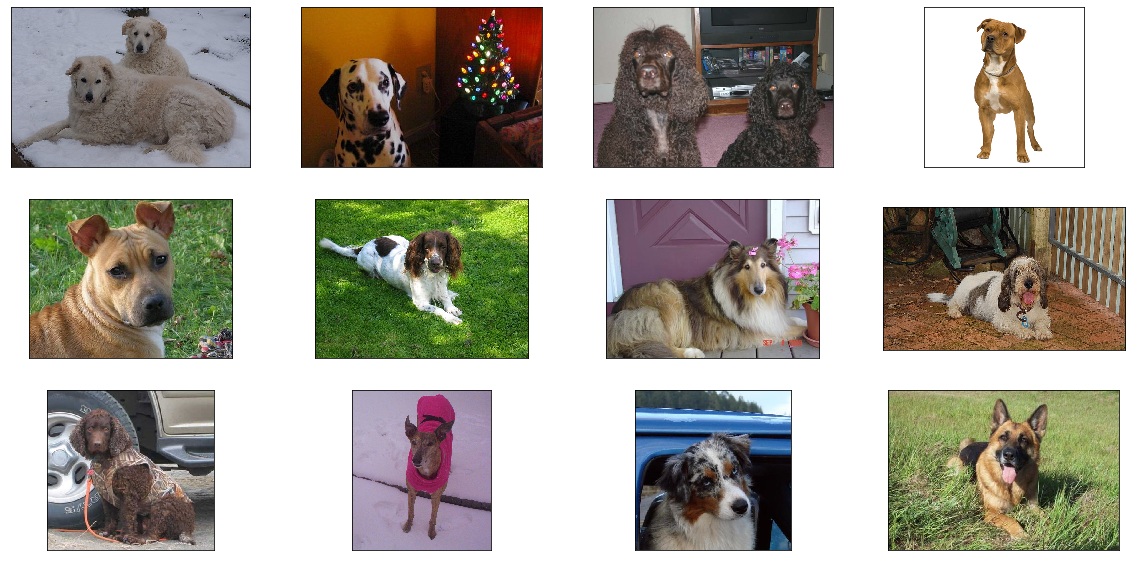

In [0]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

fig = plt.figure(figsize=(20, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, xticks=[], yticks=[])
    visualize_img(train_files[i], ax)

In [0]:
import os
os.mkdir("/bottleneck_features")

In [0]:
!wget -P /bottleneck_features https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz

--2020-01-03 18:28:25--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.120
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 850230376 (811M) [application/x-www-form-urlencoded]
Saving to: ‘/bottleneck_features/DogVGG16Data.npz.1’

DogVGG16Data.npz.1  100%[===================>] 810.84M  77.2MB/s    in 11s     

2020-01-03 18:28:36 (76.0 MB/s) - ‘/bottleneck_features/DogVGG16Data.npz.1’ saved [850230376/850230376]



In [0]:
bottleneck_features = np.load('/bottleneck_features/DogVGG16Data.npz')
train_vgg16 = bottleneck_features['train']
test_vgg16 = bottleneck_features['test']
valid_vgg16 = bottleneck_features['valid']

In [0]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(7, 7, 512)))
model.add(Dense(133, activation='softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               3336837   
Total params: 3,336,837
Trainable params: 3,336,837
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.layers import GlobalAveragePooling2D

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7, 7, 512)))
model.add(Dense(133, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='dogvgg16.weights.best.hdf5', verbose=1,
                              save_best_only=True)
model.fit(train_vgg16, train_targets, epochs=20, validation_data=(valid_vgg16, valid_targets),
         callbacks=[checkpointer], verbose=1, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6680 samples, validate on 835 samples
Epoch 1/20





6680/6680 [==============================] - 4s 585us/step - loss: 11.9659 - acc: 0.1129 - val_loss: 10.2474 - val_acc: 0.2204

Epoch 00001: val_loss improved from inf to 10.24744, saving model to dogvgg16.weights.best.hdf5
Epoch 2/20
6680/6680 [==============================] - 1s 131us/step - loss: 9.2031 - acc: 0.2976 - val_loss: 9.0502 - val_acc: 0.2922

Epoch 00002: val_loss improved from 10.24744 to 9.05016, saving model to dogvgg16.weights.best.hdf5
Epoch 3/20
6680/6680 [==============================] - 1s 134us/step - loss: 8.3653 - acc: 0.3895 - val_loss: 8.5826 - val_acc: 0.3569

Epoch 00003: val_loss improved from 9.05016 to 8.58261, saving model to dogvgg16.weights.best.hdf5
Epoch 4/20
6680/6680 [==============================] - 1s 136us/step - loss: 8.0535 - acc: 0.4361 - val_loss: 8.4083 - val_acc: 0.3772

Epoch 

In [0]:
model.load_weights('dogvgg16.weights.best.hdf5')

In [0]:
vgg16_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0)))
                    for feature in test_vgg16]

test_accuracy = 100*np.sum(np.array(vgg16_predictions) == 
                          np.argmax(test_targets, axis=1))/len(vgg16_predictions)
print('\nTest Accuracy: %.4f%%'% test_accuracy)


Test Accuracy: 50.0000%
